<a href="https://colab.research.google.com/github/ProboKrishnacahya/Machine_Learning/blob/main/Probo_Krishnacahya_0706012010039_AFL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0706012010039 - Probo Krishnacahya
**IMT01306601-A Machine Learning**

Assignment: Midterm

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [ ]:
# Load data dari GitHub
url = 'https://raw.githubusercontent.com/twiradinata/datasets/main/property_surabaya.csv'
data = pd.read_csv(url, delimiter=';')

# Munculkan head() dari data
data.head()

,cluster_name,surface_area,building_area,bedrooms,bathrooms,storey,community_price,price,ownership_status,facing,house_position,road_width,urgent,building_age,ready_to_use,furnished,category,pricing_category
0,Northwest Lake,72,69,2,2,2,1400000000,1350000000,Hak Guna Bangunan (HGB),Selatan,Standard,1-2 Mobil,No,1 - 4 Tahun,Yes,No,Premium,Over Priced
1,Bukit Palma,60,90,3,2,2,1000000000,1125000000,Pengikatan Perjanjian Jual Beli (PPJB),Selatan,Standard,1-2 Mobil,No,1 - 4 Tahun,Yes,No,Standard,Over Priced
2,Palma Classica,210,100,4,2,1,2400000000,1999000000,Hak Milik (SHM),Utara,Standard,> 2 Mobil,Yes,5 - 10 Tahun,Yes,No,Standard,Normal Price
3,Bukit Palma,120,54,3,1,1,800000000,850000000,Hak Milik (SHM),Selatan,Standard,> 2 Mobil,No,> 10 Tahun,No,No,Standard,Under Priced
4,Bukit Palma,60,90,3,2,2,800000000,1025000000,Hak Guna Bangunan (HGB),Selatan,Standard,> 2 Mobil,No,1 - 4 Tahun,Yes,No,Standard,Over Priced


In [ ]:
# Informasi dari column pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cluster_name      490 non-null    object
 1   surface_area      490 non-null    int64 
 2   building_area     490 non-null    int64 
 3   bedrooms          490 non-null    int64 
 4   bathrooms         490 non-null    int64 
 5   storey            490 non-null    int64 
 6   community_price   490 non-null    int64 
 7   price             490 non-null    int64 
 8   ownership_status  490 non-null    object
 9   facing            490 non-null    object
 10  house_position    490 non-null    object
 11  road_width        490 non-null    object
 12  urgent            480 non-null    object
 13  building_age      448 non-null    object
 14  ready_to_use      490 non-null    object
 15  furnished         490 non-null    object
 16  category          490 non-null    object
 17  pricing_category

In [ ]:
# Deskripsi dari masing-masing column pada data
data.describe()

,surface_area,building_area,bedrooms,bathrooms,storey,community_price,price
count,490.000000,490.000000,490.000000,490.000000,490.000000,4.900000e+02,4.900000e+02
mean,210.679592,241.763265,4.197959,3.265306,1.877551,4.418763e+09,4.506184e+09
std,204.129939,238.778138,2.155413,2.093671,0.512927,7.785302e+09,7.623816e+09
min,35.000000,32.000000,0.000000,1.000000,1.000000,3.000000e+08,3.000000e+08
25%,96.250000,110.000000,3.000000,2.000000,2.000000,1.500000e+09,1.400000e+09
50%,155.000000,178.500000,4.000000,3.000000,2.000000,2.500000e+09,2.550000e+09
75%,240.000000,280.000000,5.000000,4.000000,2.000000,4.500000e+09,4.300000e+09
max,2000.000000,2000.000000,36.000000,36.000000,4.000000,1.200000e+11,1.050000e+11


In [ ]:
# Cek missing value
data.isna().sum()

cluster_name         0
surface_area         0
building_area        0
bedrooms             0
bathrooms            0
storey               0
community_price      0
price                0
ownership_status     0
facing               0
house_position       0
road_width           0
urgent              10
building_age        42
ready_to_use         0
furnished            0
category             0
pricing_category    39
dtype: int64

In [ ]:
data.dropna(inplace=True)
data

,cluster_name,surface_area,building_area,bedrooms,bathrooms,storey,community_price,price,ownership_status,facing,house_position,road_width,urgent,building_age,ready_to_use,furnished,category,pricing_category
0,Northwest Lake,72,69,2,2,2,1400000000,1350000000,Hak Guna Bangunan (HGB),Selatan,Standard,1-2 Mobil,No,1 - 4 Tahun,Yes,No,Premium,Over Priced
1,Bukit Palma,60,90,3,2,2,1000000000,1125000000,Pengikatan Perjanjian Jual Beli (PPJB),Selatan,Standard,1-2 Mobil,No,1 - 4 Tahun,Yes,No,Standard,Over Priced
2,Palma Classica,210,100,4,2,1,2400000000,1999000000,Hak Milik (SHM),Utara,Standard,> 2 Mobil,Yes,5 - 10 Tahun,Yes,No,Standard,Normal Price
3,Bukit Palma,120,54,3,1,1,800000000,850000000,Hak Milik (SHM),Selatan,Standard,> 2 Mobil,No,> 10 Tahun,No,No,Standard,Under Priced
4,Bukit Palma,60,90,3,2,2,800000000,1025000000,Hak Guna Bangunan (HGB),Selatan,Standard,> 2 Mobil,No,1 - 4 Tahun,Yes,No,Standard,Over Priced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Lebak Permai Utara,200,194,5,4,1,2250000000,2250000000,Hak Milik (SHM),Barat,Standard,1-2 Mobil,No,5 - 10 Tahun,Yes,No,Standard,Normal Price
485,Wisata Semanggi Wonorejo,72,72,2,1,1,780000000,780000000,Hak Milik (SHM),Selatan,Standard,1-2 Mobil,No,1 - 4 Tahun,Yes,No,Standard,Normal Price
486,Puri Surya Jaya Gedangan Sidoarjo,659,330,5,2,1,6000000000,6000000000,Hak Guna Bangunan (HGB),Utara,Standard,> 2 Mobil,No,5 - 10 Tahun,Yes,No,Standard,Over Priced
487,Siwalankerto Permai,153,153,5,2,2,1600000000,1600000000,Hak Milik (SHM),Utara,Standard,1-2 Mobil,No,5 - 10 Tahun,Yes,No,Standard,Normal Price


In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
# Memunculkan jumlah data pada class
data.urgent.value_counts()

No     262
Yes    141
Name: urgent, dtype: int64

In [ ]:
for col in data.columns:
  if data[col].dtypes == object:
    print(col)
    print(data[col].unique())
    print('---------------')

cluster_name
['Northwest Lake' 'Bukit Palma' 'Palma Classica' 'bukit Palma' 'citraland'
 'greenlake' 'wisata bukit mas' 'Pondok Benowo' 'Darmo' 'Sutorejo'
 'northwest Lake' 'northwest park' 'royal park' 'selat golf'
 'taman puspa raya' 'darmo permai' 'graha' 'kupang indah' 'bayleaf'
 'padmosusastro' 'pakuwon indah' 'pandugo' 'ploso' 'prapen'
 'puri surya jaya' 'Tenggilis' 'taman pondok indah' 'Northwest Park'
 'Pelican Hill' 'Puri Widya' 'De Casa' 'Grand Pakuwon' 'Grand Harvest'
 'Puri Safira' 'Lidah Kulon' 'Simpang' 'TWR' 'Prambanan' 'Babatan'
 'Greenlake' 'northwest lake' 'Dukuh Kupang' 'Graha' 'pakal'
 'pakuwon city' 'villa valensia' 'wisma lidah' 'dian istana' 'forest'
 'Graha Sampurna' 'pondok maritim' 'Alam Galaxy' 'graha natura'
 'grand pakuwon' 'manyar' 'pakuwon' 'bukit golf' 'bukit palma' 'greenhill'
 'northwest central' 'northwest hill' 'lebak jaya' 'raya tambaksari'
 'raya simpang darmo permai selatan' 'pakuwon city virginia regency'
 'kertajaya indah regency' 'puri galaxy' 

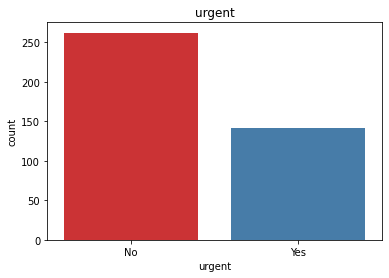

In [ ]:
# Seaborn countplot untuk memunculkan penyebaran data
sns.countplot(x = data["urgent"], palette="Set1")
plt.title("urgent")
plt.show()

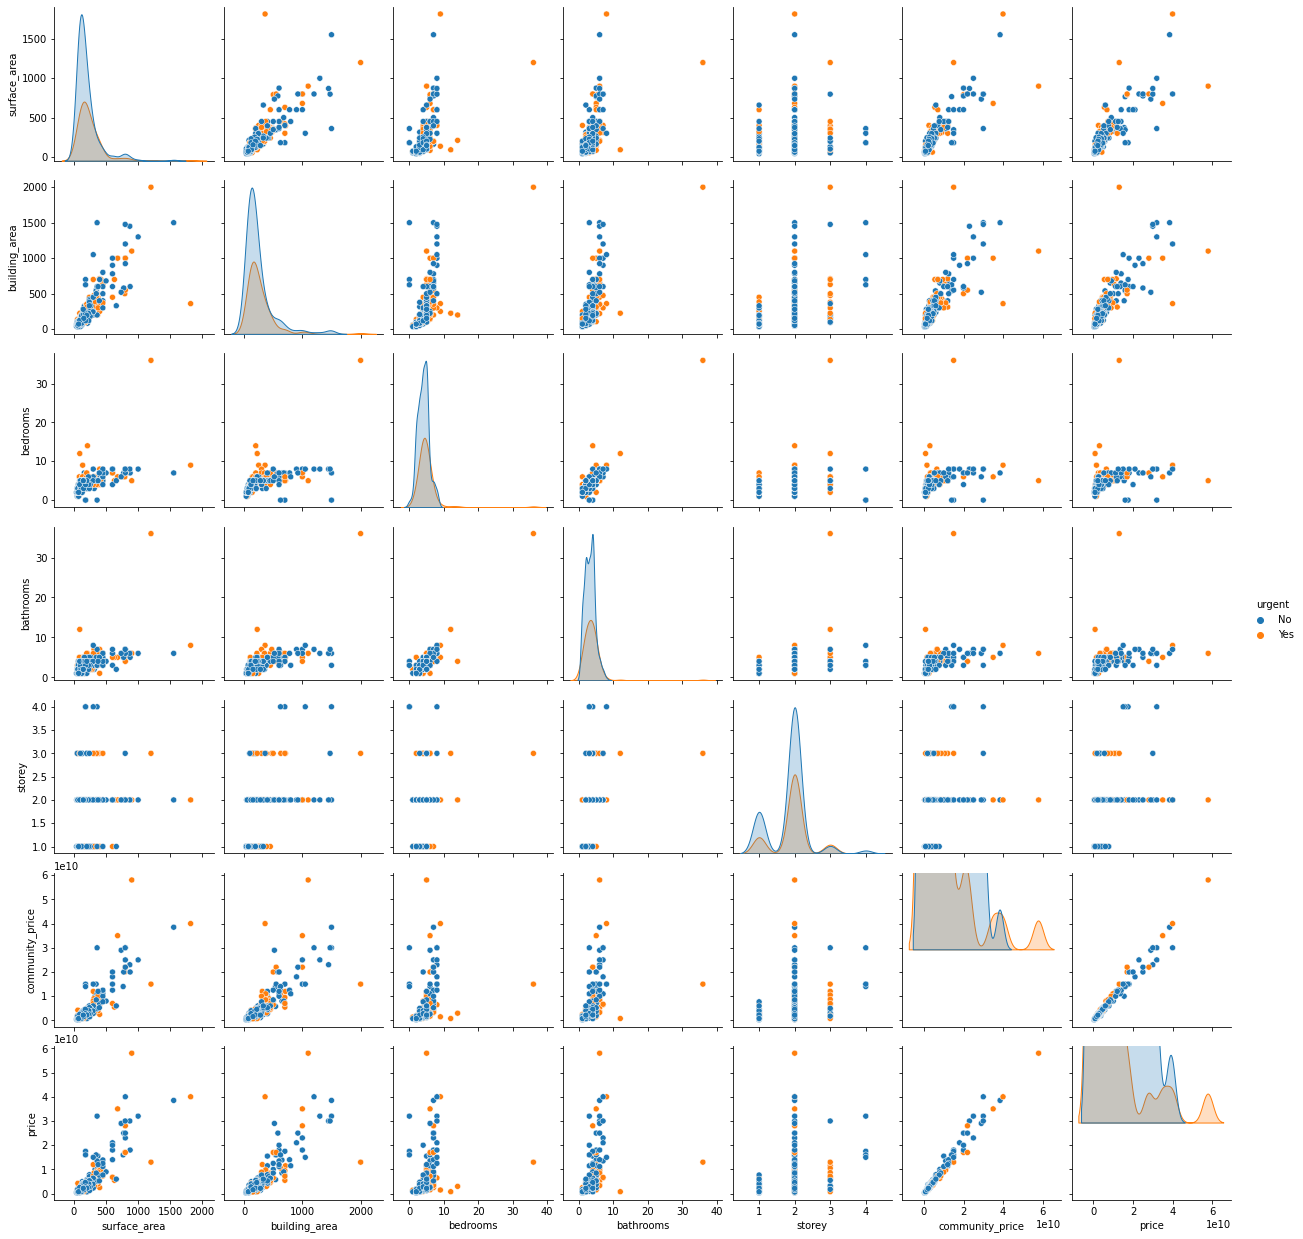

In [ ]:
# Seaborn pairplot untuk memunculkan penyebaran data
sns.pairplot(data=data, hue="urgent")
plt.show()

### Pre-procesing Data

## Classification

In [ ]:
# Memisahkan dataset menjadi x dan y menggunakan loc
X, y = data.loc[:, data.columns != 'urgent'], data.loc[:, 'urgent']
X

,cluster_name,surface_area,building_area,bedrooms,bathrooms,storey,community_price,price,ownership_status,facing,house_position,road_width,building_age,ready_to_use,furnished,category,pricing_category
0,Northwest Lake,72,69,2,2,2,1400000000,1350000000,Hak Guna Bangunan (HGB),Selatan,Standard,1-2 Mobil,1 - 4 Tahun,Yes,No,Premium,Over Priced
1,Bukit Palma,60,90,3,2,2,1000000000,1125000000,Pengikatan Perjanjian Jual Beli (PPJB),Selatan,Standard,1-2 Mobil,1 - 4 Tahun,Yes,No,Standard,Over Priced
2,Palma Classica,210,100,4,2,1,2400000000,1999000000,Hak Milik (SHM),Utara,Standard,> 2 Mobil,5 - 10 Tahun,Yes,No,Standard,Normal Price
3,Bukit Palma,120,54,3,1,1,800000000,850000000,Hak Milik (SHM),Selatan,Standard,> 2 Mobil,> 10 Tahun,No,No,Standard,Under Priced
4,Bukit Palma,60,90,3,2,2,800000000,1025000000,Hak Guna Bangunan (HGB),Selatan,Standard,> 2 Mobil,1 - 4 Tahun,Yes,No,Standard,Over Priced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,Lebak Permai Utara,200,194,5,4,1,2250000000,2250000000,Hak Milik (SHM),Barat,Standard,1-2 Mobil,5 - 10 Tahun,Yes,No,Standard,Normal Price
399,Wisata Semanggi Wonorejo,72,72,2,1,1,780000000,780000000,Hak Milik (SHM),Selatan,Standard,1-2 Mobil,1 - 4 Tahun,Yes,No,Standard,Normal Price
400,Puri Surya Jaya Gedangan Sidoarjo,659,330,5,2,1,6000000000,6000000000,Hak Guna Bangunan (HGB),Utara,Standard,> 2 Mobil,5 - 10 Tahun,Yes,No,Standard,Over Priced
401,Siwalankerto Permai,153,153,5,2,2,1600000000,1600000000,Hak Milik (SHM),Utara,Standard,1-2 Mobil,5 - 10 Tahun,Yes,No,Standard,Normal Price


In [ ]:
# Encode String/Object
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(drop='first')

In [ ]:
int_columns = [col for col in X.columns if X[col].dtypes != object]
cat_columns = [col for col in X.columns if X[col].dtypes == object]

In [ ]:
ohe.fit(X[cat_columns])

OneHotEncoder(drop='first')

In [ ]:
ohe.get_feature_names_out()

array(['cluster_name_Amerta Residence',
       'cluster_name_Araya Galaxy Bumi Permai I', 'cluster_name_Babatan',
       'cluster_name_Bratang Gede', 'cluster_name_Bukit Darmo Golf',
       'cluster_name_Bukit Palma',
       'cluster_name_Bukit Palma Citraland Utara',
       'cluster_name_Bumi Marina Mas Barat ',
       'cluster_name_Citra Harmoni', 'cluster_name_Citraland',
       'cluster_name_Citraland Utara', 'cluster_name_Darmahusada Indah',
       'cluster_name_Darmahusada Indah Utara', 'cluster_name_Darmo',
       'cluster_name_Darmo Baru', 'cluster_name_Darmo Indah',
       'cluster_name_Darmo Indah Selatan', 'cluster_name_Darmo Permai',
       'cluster_name_De Casa', 'cluster_name_Dian Istana',
       'cluster_name_Duku Pondok Tjandra Indah',
       'cluster_name_Dukuh Kupang',
       'cluster_name_Florence Laguna Pakuwon City',
       'cluster_name_Gading Kirana Sidoarjo',
       'cluster_name_Gayungsari Barat', 'cluster_name_Graha',
       'cluster_name_Graha Famili', 'clust

In [ ]:
cat_df = pd.DataFrame(ohe.transform(X[cat_columns]).toarray(), columns=ohe.get_feature_names_out())
cat_df

,cluster_name_Amerta Residence,cluster_name_Araya Galaxy Bumi Permai I,cluster_name_Babatan,cluster_name_Bratang Gede,cluster_name_Bukit Darmo Golf,cluster_name_Bukit Palma,cluster_name_Bukit Palma Citraland Utara,cluster_name_Bumi Marina Mas Barat,cluster_name_Citra Harmoni,cluster_name_Citraland,...,road_width_< 1 Mobil,road_width_> 2 Mobil,building_age_5 - 10 Tahun,building_age_> 10 Tahun,ready_to_use_Yes,furnished_Yes,category_Sangat Premium,category_Standard,pricing_category_Over Priced,pricing_category_Under Priced
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Melakukan normalisasi data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X[int_columns]), columns = int_columns)
X_num_scaled.head()

,surface_area,building_area,bedrooms,bathrooms,storey,community_price,price
0,0.017998,0.018801,0.055556,0.028571,0.333333,0.019064,0.018198
1,0.011249,0.029472,0.083333,0.028571,0.333333,0.012132,0.014298
2,0.095613,0.034553,0.111111,0.028571,0.000000,0.036395,0.029445
3,0.044994,0.011179,0.083333,0.000000,0.000000,0.008666,0.009532
4,0.011249,0.029472,0.083333,0.028571,0.333333,0.008666,0.012565


In [ ]:
final_X = pd.concat([X_num_scaled, cat_df], axis = 1)
final_X

,surface_area,building_area,bedrooms,bathrooms,storey,community_price,price,cluster_name_Amerta Residence,cluster_name_Araya Galaxy Bumi Permai I,cluster_name_Babatan,...,road_width_< 1 Mobil,road_width_> 2 Mobil,building_age_5 - 10 Tahun,building_age_> 10 Tahun,ready_to_use_Yes,furnished_Yes,category_Sangat Premium,category_Standard,pricing_category_Over Priced,pricing_category_Under Priced
0,0.017998,0.018801,0.055556,0.028571,0.333333,0.019064,0.018198,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.011249,0.029472,0.083333,0.028571,0.333333,0.012132,0.014298,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.095613,0.034553,0.111111,0.028571,0.000000,0.036395,0.029445,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.044994,0.011179,0.083333,0.000000,0.000000,0.008666,0.009532,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.011249,0.029472,0.083333,0.028571,0.333333,0.008666,0.012565,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.089989,0.082317,0.138889,0.085714,0.000000,0.033795,0.033795,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
399,0.017998,0.020325,0.055556,0.000000,0.000000,0.008319,0.008319,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
400,0.348144,0.151423,0.138889,0.028571,0.000000,0.098787,0.098787,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
401,0.063555,0.061484,0.138889,0.028571,0.333333,0.022530,0.022530,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Setelah dataset dibagi menjadi x = atribut dan y = class kemudian dipisahkan menjadi data training dan testing menggunakan train_test_split()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size = 0.3, random_state = 32)
X_train

,surface_area,building_area,bedrooms,bathrooms,storey,community_price,price,cluster_name_Amerta Residence,cluster_name_Araya Galaxy Bumi Permai I,cluster_name_Babatan,...,road_width_< 1 Mobil,road_width_> 2 Mobil,building_age_5 - 10 Tahun,building_age_> 10 Tahun,ready_to_use_Yes,furnished_Yes,category_Sangat Premium,category_Standard,pricing_category_Over Priced,pricing_category_Under Priced
118,0.078740,0.049797,0.111111,0.028571,0.333333,0.038128,0.038128,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
394,0.065804,0.076220,0.138889,0.085714,0.333333,0.062392,0.062392,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
172,0.148481,0.151423,0.138889,0.085714,0.333333,0.098787,0.098787,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
27,0.095613,0.126016,0.111111,0.085714,0.333333,0.051127,0.049393,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
284,0.119235,0.110772,0.138889,0.085714,0.333333,0.081456,0.071057,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.426322,0.733740,0.222222,0.171429,0.666667,0.514731,0.514731,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
310,0.114736,0.107724,0.138889,0.057143,0.333333,0.020797,0.017331,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
389,0.046119,0.024390,0.083333,0.028571,0.000000,0.007799,0.007799,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
43,0.022497,0.047256,0.111111,0.085714,0.333333,0.017331,0.021664,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()

param_grid = {
    'C': [0.5, 1, 1.5, 2, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END ........C=0.5, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.5, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.5, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.5, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.5, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...........C=0.5, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.5, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.5, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.5, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.5, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.5, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.5, degree=2, gamma=scale

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1, 1.5, 2, 10, 100], 'degree': [2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
model = SVC(**grid_search.best_params_)

In [ ]:
model.fit(X_train, y_train)

SVC(C=10, degree=2)

In [ ]:
model.score(X_train, y_train)

1.0

In [ ]:
model.score(X_test, y_test)

0.7272727272727273

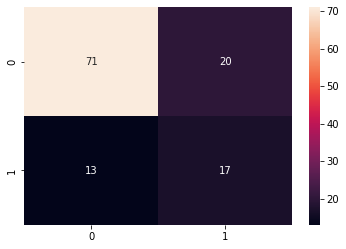

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(X_test))

sns.heatmap(cm, annot=True)
plt.show();

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

          No       0.85      0.78      0.81        91
         Yes       0.46      0.57      0.51        30

    accuracy                           0.73       121
   macro avg       0.65      0.67      0.66       121
weighted avg       0.75      0.73      0.74       121



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

param_grid = {
  'criterion' : ['gini', 'entropy'],
  'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..................criterion=gini, max_features=auto; total time=   0.0s
[CV] END ..................criterion=gini, max_features=auto; total time=   0.0s
[CV] END ..................criterion=gini, max_features=auto; total time=   0.0s
[CV] END ..................criterion=gini, max_features=auto; total time=   0.0s
[CV] END ..................criterion=gini, max_features=auto; total time=   0.0s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   0.0s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   0.0s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   0.0s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   0.0s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   0.0s
[CV] END ..................criterion=gini, max_features=log2; total time=   0.0s
[CV] END ..................criterion=gini, max_fe

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=2)

In [ ]:
model_2 = DecisionTreeClassifier(**grid_search.best_params_)

In [ ]:
model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_features='sqrt')

In [ ]:
model_2.score(X_train, y_train)

1.0

In [ ]:
model_2.score(X_test, y_test)

0.743801652892562

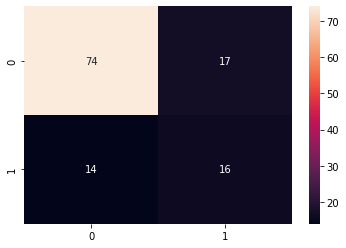

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_2.predict(X_test))

sns.heatmap(cm, annot=True)
plt.show();

In [ ]:
report = classification_report(y_test, model_2.predict(X_test))
print(report)

              precision    recall  f1-score   support

          No       0.84      0.81      0.83        91
         Yes       0.48      0.53      0.51        30

    accuracy                           0.74       121
   macro avg       0.66      0.67      0.67       121
weighted avg       0.75      0.74      0.75       121



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [ ]:
param_grid = {
  'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
  'criterion' : ['gini', 'entropy'],
  'max_features' : ['auto', 'sqrt', 'log2'],
  'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, n_estimators=

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [ ]:
model_3 = RandomForestClassifier(**grid_search.best_params_)

In [ ]:
model_3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features='log2')

In [ ]:
model_3.score(X_train, y_train)

1.0

In [ ]:
model_3.score(X_test, y_test)

0.7933884297520661

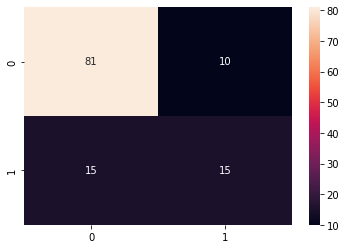

In [ ]:
cm = confusion_matrix(y_test, model_3.predict(X_test))

sns.heatmap(cm, annot=True)
plt.show();

In [ ]:
report = classification_report(y_test, model_3.predict(X_test))

print(report)

              precision    recall  f1-score   support

          No       0.84      0.89      0.87        91
         Yes       0.60      0.50      0.55        30

    accuracy                           0.79       121
   macro avg       0.72      0.70      0.71       121
weighted avg       0.78      0.79      0.79       121



## Gaussian Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb.score(X_train, y_train)

0.8297872340425532

In [ ]:
nb.score(X_test, y_test)

0.49586776859504134

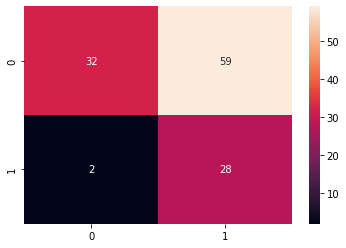

In [ ]:
cm = confusion_matrix(y_test, nb.predict(X_test))

sns.heatmap(cm, annot=True)
plt.show();

In [ ]:
report = classification_report(y_test, nb.predict(X_test))

print(report)

              precision    recall  f1-score   support

          No       0.94      0.35      0.51        91
         Yes       0.32      0.93      0.48        30

    accuracy                           0.50       121
   macro avg       0.63      0.64      0.50       121
weighted avg       0.79      0.50      0.50       121



## K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
acc_train = []
acc_test = []

for n in range(2, 15):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  acc_train.append(knn.score(X_train, y_train))
  acc_test.append(knn.score(X_test, y_test))

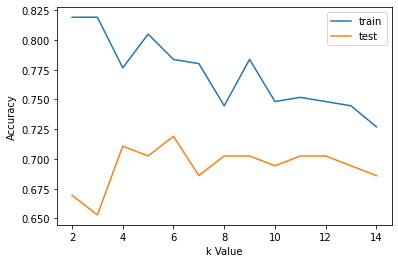

In [ ]:
plt.plot(range(2,15),acc_train,label="train")
plt.plot(range(2,15),acc_test,label="test")
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [ ]:
knn.score(X_train, y_train)

0.7269503546099291

In [ ]:
knn.score(X_test, y_test)

0.6859504132231405

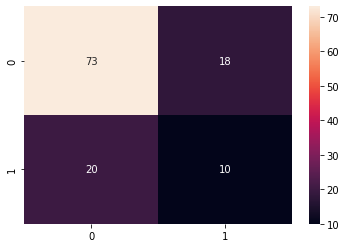

In [ ]:
cm = confusion_matrix(y_test, knn.predict(X_test))

sns.heatmap(cm, annot=True)
plt.show();

In [ ]:
report = classification_report(y_test, knn.predict(X_test))

print(report)

              precision    recall  f1-score   support

          No       0.78      0.80      0.79        91
         Yes       0.36      0.33      0.34        30

    accuracy                           0.69       121
   macro avg       0.57      0.57      0.57       121
weighted avg       0.68      0.69      0.68       121



## Regression

In [ ]:
#data sudah di dropna
data

,cluster_name,surface_area,building_area,bedrooms,bathrooms,storey,community_price,price,ownership_status,facing,house_position,road_width,urgent,building_age,ready_to_use,furnished,category,pricing_category
0,Northwest Lake,72,69,2,2,2,1400000000,1350000000,Hak Guna Bangunan (HGB),Selatan,Standard,1-2 Mobil,No,1 - 4 Tahun,Yes,No,Premium,Over Priced
1,Bukit Palma,60,90,3,2,2,1000000000,1125000000,Pengikatan Perjanjian Jual Beli (PPJB),Selatan,Standard,1-2 Mobil,No,1 - 4 Tahun,Yes,No,Standard,Over Priced
2,Palma Classica,210,100,4,2,1,2400000000,1999000000,Hak Milik (SHM),Utara,Standard,> 2 Mobil,Yes,5 - 10 Tahun,Yes,No,Standard,Normal Price
3,Bukit Palma,120,54,3,1,1,800000000,850000000,Hak Milik (SHM),Selatan,Standard,> 2 Mobil,No,> 10 Tahun,No,No,Standard,Under Priced
4,Bukit Palma,60,90,3,2,2,800000000,1025000000,Hak Guna Bangunan (HGB),Selatan,Standard,> 2 Mobil,No,1 - 4 Tahun,Yes,No,Standard,Over Priced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,Lebak Permai Utara,200,194,5,4,1,2250000000,2250000000,Hak Milik (SHM),Barat,Standard,1-2 Mobil,No,5 - 10 Tahun,Yes,No,Standard,Normal Price
399,Wisata Semanggi Wonorejo,72,72,2,1,1,780000000,780000000,Hak Milik (SHM),Selatan,Standard,1-2 Mobil,No,1 - 4 Tahun,Yes,No,Standard,Normal Price
400,Puri Surya Jaya Gedangan Sidoarjo,659,330,5,2,1,6000000000,6000000000,Hak Guna Bangunan (HGB),Utara,Standard,> 2 Mobil,No,5 - 10 Tahun,Yes,No,Standard,Over Priced
401,Siwalankerto Permai,153,153,5,2,2,1600000000,1600000000,Hak Milik (SHM),Utara,Standard,1-2 Mobil,No,5 - 10 Tahun,Yes,No,Standard,Normal Price


### Pre-procesing Data

In [ ]:
# Memisahkan dataset menjadi x dan y menggunakan loc
X, y = data.iloc[:, data.columns != 'price'], data.iloc[:, data.columns == 'price']
X

,cluster_name,surface_area,building_area,bedrooms,bathrooms,storey,community_price,ownership_status,facing,house_position,road_width,urgent,building_age,ready_to_use,furnished,category,pricing_category
0,Northwest Lake,72,69,2,2,2,1400000000,Hak Guna Bangunan (HGB),Selatan,Standard,1-2 Mobil,No,1 - 4 Tahun,Yes,No,Premium,Over Priced
1,Bukit Palma,60,90,3,2,2,1000000000,Pengikatan Perjanjian Jual Beli (PPJB),Selatan,Standard,1-2 Mobil,No,1 - 4 Tahun,Yes,No,Standard,Over Priced
2,Palma Classica,210,100,4,2,1,2400000000,Hak Milik (SHM),Utara,Standard,> 2 Mobil,Yes,5 - 10 Tahun,Yes,No,Standard,Normal Price
3,Bukit Palma,120,54,3,1,1,800000000,Hak Milik (SHM),Selatan,Standard,> 2 Mobil,No,> 10 Tahun,No,No,Standard,Under Priced
4,Bukit Palma,60,90,3,2,2,800000000,Hak Guna Bangunan (HGB),Selatan,Standard,> 2 Mobil,No,1 - 4 Tahun,Yes,No,Standard,Over Priced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,Lebak Permai Utara,200,194,5,4,1,2250000000,Hak Milik (SHM),Barat,Standard,1-2 Mobil,No,5 - 10 Tahun,Yes,No,Standard,Normal Price
399,Wisata Semanggi Wonorejo,72,72,2,1,1,780000000,Hak Milik (SHM),Selatan,Standard,1-2 Mobil,No,1 - 4 Tahun,Yes,No,Standard,Normal Price
400,Puri Surya Jaya Gedangan Sidoarjo,659,330,5,2,1,6000000000,Hak Guna Bangunan (HGB),Utara,Standard,> 2 Mobil,No,5 - 10 Tahun,Yes,No,Standard,Over Priced
401,Siwalankerto Permai,153,153,5,2,2,1600000000,Hak Milik (SHM),Utara,Standard,1-2 Mobil,No,5 - 10 Tahun,Yes,No,Standard,Normal Price


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(drop='first')

In [ ]:
int_columns = [col for col in X.columns if X[col].dtypes != object]
cat_columns = [col for col in X.columns if X[col].dtypes == object]

In [ ]:
int_columns

['surface_area',
 'building_area',
 'bedrooms',
 'bathrooms',
 'storey',
 'community_price']

In [ ]:
cat_columns

['cluster_name',
 'ownership_status',
 'facing',
 'house_position',
 'road_width',
 'urgent',
 'building_age',
 'ready_to_use',
 'furnished',
 'category',
 'pricing_category']

In [ ]:
ohe.fit(X[cat_columns])

OneHotEncoder(drop='first')

In [ ]:
ohe.get_feature_names_out()

array(['cluster_name_Amerta Residence',
       'cluster_name_Araya Galaxy Bumi Permai I', 'cluster_name_Babatan',
       'cluster_name_Bratang Gede', 'cluster_name_Bukit Darmo Golf',
       'cluster_name_Bukit Palma',
       'cluster_name_Bukit Palma Citraland Utara',
       'cluster_name_Bumi Marina Mas Barat ',
       'cluster_name_Citra Harmoni', 'cluster_name_Citraland',
       'cluster_name_Citraland Utara', 'cluster_name_Darmahusada Indah',
       'cluster_name_Darmahusada Indah Utara', 'cluster_name_Darmo',
       'cluster_name_Darmo Baru', 'cluster_name_Darmo Indah',
       'cluster_name_Darmo Indah Selatan', 'cluster_name_Darmo Permai',
       'cluster_name_De Casa', 'cluster_name_Dian Istana',
       'cluster_name_Duku Pondok Tjandra Indah',
       'cluster_name_Dukuh Kupang',
       'cluster_name_Florence Laguna Pakuwon City',
       'cluster_name_Gading Kirana Sidoarjo',
       'cluster_name_Gayungsari Barat', 'cluster_name_Graha',
       'cluster_name_Graha Famili', 'clust

In [ ]:
ohe.transform(X[cat_columns])

<403x249 sparse matrix of type '<class 'numpy.float64'>'
	with 2980 stored elements in Compressed Sparse Row format>

In [ ]:
cat_df = pd.DataFrame(ohe.transform(X[cat_columns]).toarray(), columns=ohe.get_feature_names_out())
cat_df

,cluster_name_Amerta Residence,cluster_name_Araya Galaxy Bumi Permai I,cluster_name_Babatan,cluster_name_Bratang Gede,cluster_name_Bukit Darmo Golf,cluster_name_Bukit Palma,cluster_name_Bukit Palma Citraland Utara,cluster_name_Bumi Marina Mas Barat,cluster_name_Citra Harmoni,cluster_name_Citraland,...,road_width_> 2 Mobil,urgent_Yes,building_age_5 - 10 Tahun,building_age_> 10 Tahun,ready_to_use_Yes,furnished_Yes,category_Sangat Premium,category_Standard,pricing_category_Over Priced,pricing_category_Under Priced
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Melakukan normalisasi data numerik
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X[int_columns]), columns = int_columns)
X_num_scaled.head()

,surface_area,building_area,bedrooms,bathrooms,storey,community_price
0,0.017998,0.018801,0.055556,0.028571,0.333333,0.019064
1,0.011249,0.029472,0.083333,0.028571,0.333333,0.012132
2,0.095613,0.034553,0.111111,0.028571,0.000000,0.036395
3,0.044994,0.011179,0.083333,0.000000,0.000000,0.008666
4,0.011249,0.029472,0.083333,0.028571,0.333333,0.008666


In [ ]:
final_X = pd.concat([X_num_scaled, cat_df], axis = 1)
final_X

,surface_area,building_area,bedrooms,bathrooms,storey,community_price,cluster_name_Amerta Residence,cluster_name_Araya Galaxy Bumi Permai I,cluster_name_Babatan,cluster_name_Bratang Gede,...,road_width_> 2 Mobil,urgent_Yes,building_age_5 - 10 Tahun,building_age_> 10 Tahun,ready_to_use_Yes,furnished_Yes,category_Sangat Premium,category_Standard,pricing_category_Over Priced,pricing_category_Under Priced
0,0.017998,0.018801,0.055556,0.028571,0.333333,0.019064,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.011249,0.029472,0.083333,0.028571,0.333333,0.012132,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.095613,0.034553,0.111111,0.028571,0.000000,0.036395,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.044994,0.011179,0.083333,0.000000,0.000000,0.008666,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.011249,0.029472,0.083333,0.028571,0.333333,0.008666,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.089989,0.082317,0.138889,0.085714,0.000000,0.033795,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
399,0.017998,0.020325,0.055556,0.000000,0.000000,0.008319,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
400,0.348144,0.151423,0.138889,0.028571,0.000000,0.098787,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
401,0.063555,0.061484,0.138889,0.028571,0.333333,0.022530,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y

,price
0,1350000000
1,1125000000
2,1999000000
3,850000000
4,1025000000
...,...
398,2250000000
399,780000000
400,6000000000
401,1600000000


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size = 0.3, random_state = 32)
X_train

,surface_area,building_area,bedrooms,bathrooms,storey,community_price,cluster_name_Amerta Residence,cluster_name_Araya Galaxy Bumi Permai I,cluster_name_Babatan,cluster_name_Bratang Gede,...,road_width_> 2 Mobil,urgent_Yes,building_age_5 - 10 Tahun,building_age_> 10 Tahun,ready_to_use_Yes,furnished_Yes,category_Sangat Premium,category_Standard,pricing_category_Over Priced,pricing_category_Under Priced
118,0.078740,0.049797,0.111111,0.028571,0.333333,0.038128,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
394,0.065804,0.076220,0.138889,0.085714,0.333333,0.062392,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
172,0.148481,0.151423,0.138889,0.085714,0.333333,0.098787,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
27,0.095613,0.126016,0.111111,0.085714,0.333333,0.051127,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
284,0.119235,0.110772,0.138889,0.085714,0.333333,0.081456,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.426322,0.733740,0.222222,0.171429,0.666667,0.514731,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
310,0.114736,0.107724,0.138889,0.057143,0.333333,0.020797,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
389,0.046119,0.024390,0.083333,0.028571,0.000000,0.007799,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
43,0.022497,0.047256,0.111111,0.085714,0.333333,0.017331,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Linear Regression

In [ ]:
import statsmodels.api as sm

x = sm.add_constant(X_train)

#fit linear regression model
model_reg = sm.OLS(y_train, x).fit()

#view model summary
print(model_reg.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     64.59
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           6.13e-55
Time:                        15:04:41   Log-Likelihood:                -6081.6
No. Observations:                 282   AIC:                         1.257e+04
Df Residuals:                      81   BIC:                         1.330e+04
Df Model:                         200                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
def RMSE(true, predict):
  se = (true-predict)**2
  return (se.mean())**(1/2)

In [ ]:
rmse1 = RMSE(y_test['price'], model_reg.predict(sm.add_constant(X_test)))
print(f'RMSE model 1 = {rmse1:.4f}', )

RMSE model 1 = 1052894172.8341


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_train.columns

Index(['surface_area', 'building_area', 'bedrooms', 'bathrooms', 'storey',
       'community_price', 'cluster_name_Amerta Residence',
       'cluster_name_Araya Galaxy Bumi Permai I', 'cluster_name_Babatan',
       'cluster_name_Bratang Gede',
       ...
       'road_width_> 2 Mobil', 'urgent_Yes', 'building_age_5 - 10 Tahun',
       'building_age_> 10 Tahun', 'ready_to_use_Yes', 'furnished_Yes',
       'category_Sangat Premium', 'category_Standard',
       'pricing_category_Over Priced', 'pricing_category_Under Priced'],
      dtype='object', length=255)

In [ ]:
used_columns = ['surface_area', 'building_area', 'bedrooms', 'storey',
                'urgent_Yes',
                'category_Sangat Premium', 'category_Standard']

In [ ]:
import statsmodels.api as sm

x = sm.add_constant(X_train[used_columns])

#fit linear regression model
model_reg = sm.OLS(y_train, x).fit()

#view model summary
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     199.2
Date:                Mon, 31 Oct 2022   Prob (F-statistic):          1.47e-103
Time:                        15:04:41   Log-Likelihood:                -6542.9
No. Observations:                 282   AIC:                         1.310e+04
Df Residuals:                     274   BIC:                         1.313e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [ ]:
rmse2 = RMSE(y_test['price'], model_reg.predict(sm.add_constant(X_test[used_columns])))
print(f'RMSE model 2 = {rmse2:.4f}', )

RMSE model 1 = 1591448896.1585


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Hypothesis Plots

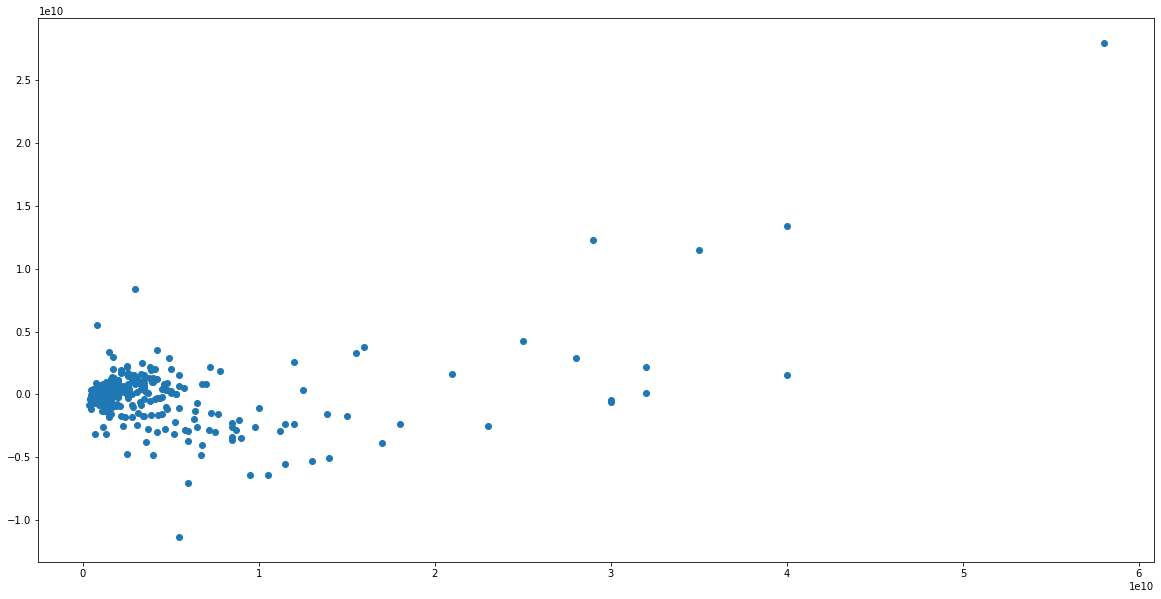

In [ ]:
plt.figure(figsize = (20, 10))
plt.scatter(y_train['price'], model_reg.resid.values)

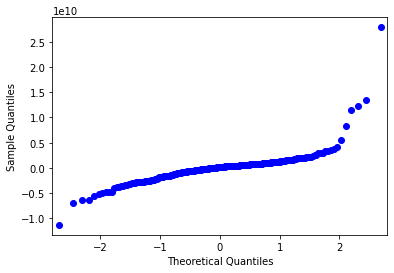

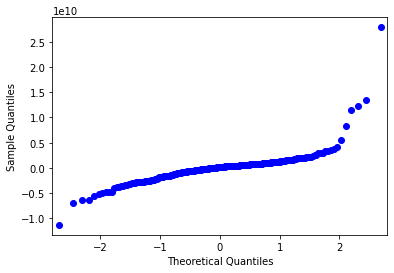

In [ ]:
sm.qqplot(model_reg.resid)

### Hypothesis Tests 

Durbin Watson Test for Autocorrelation (Independence)

In [ ]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
durbin_watson(model_reg.resid)

2.126805641579328

Shapiro Wilk Test for Normality

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(model_reg.resid)

ShapiroResult(statistic=0.698337197303772, pvalue=3.4623344943865395e-22)

Goldfeld-Quandt Test for Heteroscedasticity

In [ ]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [ ]:
het_goldfeldquandt(model_reg.resid, y_train['price'].values.reshape(-1, 1))

(0.7034853768377959, 0.9808540004188968, 'increasing')

## Polynomial Regression

In [ ]:
for col in int_columns:
  X[col+'_2'] = X[col]**2
  X[col+'_3'] = X[col]**3

In [ ]:
int_columns = ['surface_area', 'building_area', 'bedrooms', 'storey',
               'surface_area_2', 'building_area_2', 'bedrooms_2', 'storey_2',
               'surface_area_3', 'building_area_3', 'bedrooms_3', 'storey_3']

In [ ]:
scaler = MinMaxScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X[int_columns]), columns = int_columns)
X_num_scaled.head()

,surface_area,building_area,bedrooms,storey,surface_area_2,building_area_2,bedrooms_2,storey_2,surface_area_3,building_area_3,bedrooms_3,storey_3
0,0.017998,0.018801,0.055556,0.333333,0.001085,0.000934,0.003086,0.2,0.000051,0.000037,0.000171,0.111111
1,0.011249,0.029472,0.083333,0.333333,0.000605,0.001769,0.006944,0.2,0.000025,0.000087,0.000579,0.111111
2,0.095613,0.034553,0.111111,0.000000,0.012865,0.002245,0.012346,0.0,0.001531,0.000121,0.001372,0.000000
3,0.044994,0.011179,0.083333,0.000000,0.003875,0.000473,0.006944,0.0,0.000277,0.000016,0.000579,0.000000
4,0.011249,0.029472,0.083333,0.333333,0.000605,0.001769,0.006944,0.2,0.000025,0.000087,0.000579,0.111111


In [ ]:
final_X = pd.concat([X_num_scaled, cat_df], axis = 1)
final_X

,surface_area,building_area,bedrooms,storey,surface_area_2,building_area_2,bedrooms_2,storey_2,surface_area_3,building_area_3,...,road_width_> 2 Mobil,urgent_Yes,building_age_5 - 10 Tahun,building_age_> 10 Tahun,ready_to_use_Yes,furnished_Yes,category_Sangat Premium,category_Standard,pricing_category_Over Priced,pricing_category_Under Priced
0,0.017998,0.018801,0.055556,0.333333,0.001085,0.000934,0.003086,0.2,0.000051,0.000037,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.011249,0.029472,0.083333,0.333333,0.000605,0.001769,0.006944,0.2,0.000025,0.000087,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.095613,0.034553,0.111111,0.000000,0.012865,0.002245,0.012346,0.0,0.001531,0.000121,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.044994,0.011179,0.083333,0.000000,0.003875,0.000473,0.006944,0.0,0.000277,0.000016,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.011249,0.029472,0.083333,0.333333,0.000605,0.001769,0.006944,0.2,0.000025,0.000087,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.089989,0.082317,0.138889,0.000000,0.011624,0.009155,0.019290,0.0,0.001321,0.000909,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
399,0.017998,0.020325,0.055556,0.000000,0.001085,0.001040,0.003086,0.0,0.000051,0.000043,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
400,0.348144,0.151423,0.138889,0.000000,0.130976,0.026976,0.019290,0.0,0.047619,0.004488,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
401,0.063555,0.061484,0.138889,0.333333,0.006602,0.005598,0.019290,0.2,0.000585,0.000444,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size = 0.3, random_state = 32)
X_train

,surface_area,building_area,bedrooms,storey,surface_area_2,building_area_2,bedrooms_2,storey_2,surface_area_3,building_area_3,...,road_width_> 2 Mobil,urgent_Yes,building_age_5 - 10 Tahun,building_age_> 10 Tahun,ready_to_use_Yes,furnished_Yes,category_Sangat Premium,category_Standard,pricing_category_Over Priced,pricing_category_Under Priced
118,0.078740,0.049797,0.111111,0.333333,0.009323,0.003970,0.012346,0.200000,0.000960,0.000271,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
394,0.065804,0.076220,0.138889,0.333333,0.006977,0.008027,0.019290,0.200000,0.000633,0.000749,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
172,0.148481,0.151423,0.138889,0.333333,0.027491,0.026976,0.019290,0.200000,0.004665,0.004488,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
27,0.095613,0.126016,0.111111,0.333333,0.012865,0.019349,0.012346,0.200000,0.001531,0.002740,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
284,0.119235,0.110772,0.138889,0.333333,0.018739,0.015373,0.019290,0.200000,0.002653,0.001949,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.426322,0.733740,0.222222,0.666667,0.192281,0.544527,0.049383,0.533333,0.084562,0.401945,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
310,0.114736,0.107724,0.138889,0.333333,0.017538,0.014632,0.019290,0.200000,0.002407,0.001812,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
389,0.046119,0.024390,0.083333,0.000000,0.004021,0.001344,0.006944,0.000000,0.000292,0.000060,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
43,0.022497,0.047256,0.111111,0.333333,0.001453,0.003651,0.012346,0.200000,0.000075,0.000240,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
import statsmodels.api as sm

x = sm.add_constant(X_train)

#fit linear regression model
model_reg = sm.OLS(y_train, x).fit()

#view model summary
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     17.23
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           5.48e-31
Time:                        15:04:42   Log-Likelihood:                -6253.3
No. Observations:                 282   AIC:                         1.292e+04
Df Residuals:                      76   BIC:                         1.367e+04
Df Model:                         205                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
def RMSE(true, predict):
  se = (true-predict)**2
  return (se.mean())**(1/2)

Root Mean Squared Error

In [ ]:
rmse1 = RMSE(y_test['price'], model_reg.predict(sm.add_constant(X_test)))
print(f'RMSE model 1 = {rmse1:.4f}', )

RMSE model 1 = 3189700976.4839


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_train.columns

Index(['surface_area', 'building_area', 'bedrooms', 'storey', 'surface_area_2',
       'building_area_2', 'bedrooms_2', 'storey_2', 'surface_area_3',
       'building_area_3',
       ...
       'road_width_> 2 Mobil', 'urgent_Yes', 'building_age_5 - 10 Tahun',
       'building_age_> 10 Tahun', 'ready_to_use_Yes', 'furnished_Yes',
       'category_Sangat Premium', 'category_Standard',
       'pricing_category_Over Priced', 'pricing_category_Under Priced'],
      dtype='object', length=261)

In [ ]:
used_columns = ['building_area', 'storey',
                'building_area_2', 'bedrooms_2', 'storey_2',
                'building_area_3', 'bedrooms_3', 'storey_3',
                'category_Sangat Premium', 'category_Standard']

In [ ]:
import statsmodels.api as sm

x = sm.add_constant(X_train[used_columns])

#fit linear regression model
model_reg = sm.OLS(y_train, x).fit()

#view model summary
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     91.75
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           5.50e-81
Time:                        15:04:43   Log-Likelihood:                -6589.2
No. Observations:                 282   AIC:                         1.320e+04
Df Residuals:                     271   BIC:                         1.324e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

In [ ]:
rmse2 = RMSE(y_test['price'], model_reg.predict(sm.add_constant(X_test[used_columns])))
print(f'RMSE model 2 = {rmse2:.4f}', )

RMSE model 2 = 1708525568.2176


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
RMSE(y_test['price'], neigh.predict(X_test).reshape(1, -1)[0])

2143780875.923905

Params to be tuned


n_neighbors : int

weights : {‘uniform’, ‘distance’}

algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}

leaf_size : int

## Gaussian Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
RMSE(y_test['price'], clf.predict(X_test).reshape(1, -1)[0])

1197586028.9386394

## Support Vector Machine

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

regr = make_pipeline(SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('svr', SVR(epsilon=0.2))])

In [ ]:
RMSE(y_test['price'], regr.predict(X_test).reshape(1, -1)[0])

5531260388.77573

Params to be tuned

kernel : {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} 

degree : int

gamma : {‘scale’, ‘auto’}

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor(max_depth=2)
dr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [ ]:
RMSE(y_test['price'], dr.predict(X_test).reshape(1, -1)[0])

2767343255.5860014

Params to be tuned:

criterion : {“squared_error”, “absolute_error”, “poisson”}

max_depth : int

min_samples_split : int

min_samples_leaf : int

max_leaf_nodes : int

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
RMSE(y_test['price'], rf.predict(X_test).reshape(1, -1)[0])

2144584204.792793

Params to be tuned:

criterion : {“squared_error”, “absolute_error”, “poisson”}

max_depth : int

min_samples_split : int

min_samples_leaf : int

max_leaf_nodes : int